<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/main/notebooks/Python_misc_NewtonsMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニュートン法によるN次元多項式の求根



$n$次元多項式$f(x) = c_0 + c_1 x + c_2 x^2 + \ldots + c_nx^n$が与えられた時、  
$f(x)=0$となるような解(根)をどのように求めたら良いだろうか？

$n=2$までの場合については、中学までで習うようによく知られた公式がある。  
$n=3,4$の場合についてもそれぞれ、[カルダノの公式]や[フェラリの解法]として知られる  
代数的な求根法が存在する。  
なお、5次以上の代数方程式には代数的な解法※が存在しないことが知られている(アーベル-ルフィニの定理)  
(※方程式の係数の有限回の四則演算および冪根操作で解を表示すること)


方程式の解や積分値などが代数的/解析的に解けない場合は、もちろん数値計算の出番となる。  

このノートブックでは、ニュートン法(あるいはニュートン・ラフソン法)として知られる求根アルゴリズムを紹介する。  

## ニュートン法

ニュートン法による関数$f(x)=0$の求根アルゴリズム自体は非常にシンプルで

1. 初期値$x \in \mathbb{R} $ (または$x \in \mathbb{C})$を決める
2.  上の初期値を$x_0$とでも呼ぶことにして、  
    $ x_{t+1} = x_t - f(x_t) / f'(x_t) $  と$x$を更新し  
    $x$の値が収束するまで更新を繰り返す

というものである。  

$\clubsuit$  進んだ注  
高次元のベクトル$\boldsymbol{x}$に拡張することもできる。   
$ \boldsymbol{x}_{t+1} = \boldsymbol{x}_{t} - \partial f(\boldsymbol{x}_t)^{-1} f(\boldsymbol{x}_t)$
$\partial f(\boldsymbol{x}_t)$はヤコビ行列になるが、  
数値計算上の困難が有り、実際に解く場合には様々な工夫が必要となる。

### ニュートン法のアルゴリズムの実装例

$n=5$の多項式の例を用いて、ニュートン法のアルゴリズムを実装してみよう。  
実数係数の多項式の場合、非ゼロの係数を持つ最大の$n$が奇数次ならば、  
関数$f(x)$は必ず実軸を横切る(つまり、$f(x)=0$の解が存在する。  

まず係数を適当に...
$c_0 = 1.0, c_1 = 1.0, c_2 = 2.0, c_3 = 3.0, c_4 = 4.0, c_5 = 5.0$
とでもして、プロットしてみよう。

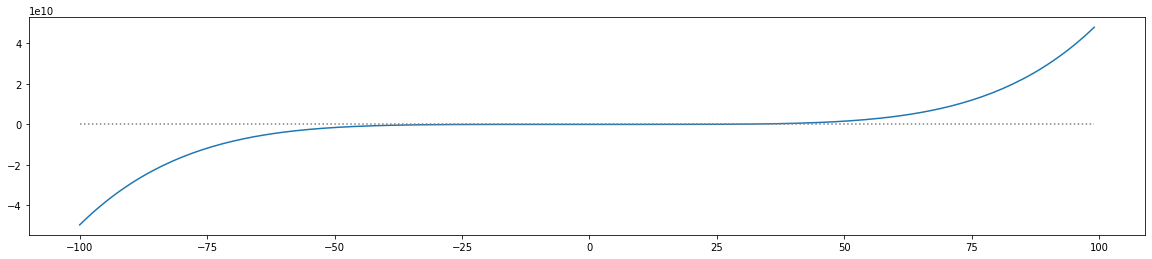

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt


## 多項式の係数を定義
cs = np.array( [1.0, 1.0, 2.0, 3.0, 4.0, 5.0] )

## 愚直に多項式とその微分を定義
def xpoly(x):
    return np.array([1.0,x,x**2,x**3,x**4,x**5])
def xpoly_prime(x):
    return np.array([0.0,1.0,2*x,3*x**2,4*x**3,5*x**4])

# 適当な区間で点を作成して描画してみる
xr = np.arange(-100,100,1.0) 
yr = np.array([ np.dot(cs,xpoly(x)) for x in xr])
fig = plt.figure(figsize = (20,4))
ax = fig.add_subplot(111)
ax.plot(xr,yr)
ax.plot(xr,0.0*yr,linestyle="dotted",color="gray") # y=0
plt.show()
plt.close() 


ゼロ点($f(x)=0$となる$x$)があることはわかるが、このスケールだと具体的な値はよくわからない。

次にニュートン法のアルゴリズムに対応する関数を作って解を求めてみよう

In [ ]:
def Newton(cs,xini,tolxrel=1.e-6,toly=1.e-6,maxit=1000):
    xp = xpoly(xini)
    xpp = xpoly_prime(xini)
    x = xini
    itnum = 0
    while True:
        y = np.dot(cs,xp)
        yp = np.dot(cs,xpp)        
        delta = y / yp
        x += - delta
        xp = xpoly(x)
        xpp = xpoly_prime(x)
        ynew = np.dot(cs,xp)
        itnum += 1
        print("it", itnum, "x",x, "y", y,ynew)
        if abs(delta/x) < tolxrel and abs(ynew) <toly:
            break
        if  itnum == maxit:
            print("x not converged")
            return None
    print("x", xini, "=>", x, " after ",itnum, "iterations")
    return x 

x_initial = -20.0
Newton(cs,x_initial)

it 1 x -16.03067071498258 y -15383219.0 -5041023.966714532
it 2 x -12.854892481957197 y -5041023.966714532 -1651968.106196959
it 3 x -10.313885990777683 y -1651968.106196959 -541379.1850391383
it 4 x -8.28061578625216 y -541379.1850391383 -177429.79752234442
it 5 x -6.653441486353502 y -177429.79752234442 -58155.11457333112
it 6 x -5.3510406877452255 y -58155.11457333112 -19063.39609222064
it 7 x -4.308351359326742 y -19063.39609222064 -6250.001804089965
it 8 x -3.4733344532483637 y -6250.001804089965 -2049.456302435744
it 9 x -2.8044032112313464 y -2049.456302435744 -672.1354918462077
it 10 x -2.268410685784332 y -672.1354918462077 -220.3982199780121
it 11 x -1.8391438506400222 y -220.3982199780121 -72.1807419252783
it 12 x -1.4963673552041776 y -72.1807419252783 -23.526420007144324
it 13 x -1.2256340399442445 y -23.526420007144324 -7.546944476833993
it 14 x -1.0192792149298004 y -7.546944476833993 -2.3017219833384583
it 15 x -0.878192974042394 y -2.3017219833384583 -0.600134717298025

-0.7897280233622771

$x=-20.0$から始めると、20回のiteration(反復)で、  
yの値が$5.e-16 \simeq 0$の点が求められている事がわかる。

今のようにうまくいく例もある一方で、関数や初期値によっては解に収束しない場合があるので注意が必要

# LICENSE


Copyright (C) 2021 Sota Yoshida

[ライセンス:クリエイティブ・コモンズ 4.0 表示 (CC-BY 4.0)](https://creativecommons.org/licenses/by/4.0/deed.ja)